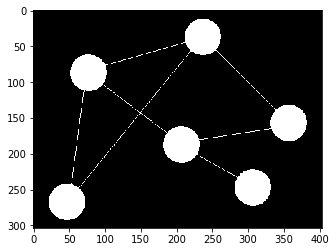

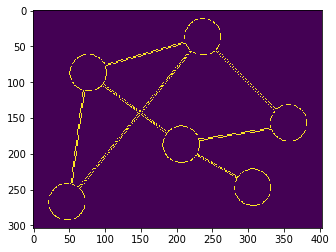

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = (cv2.cvtColor(cv2.imread('graph.png'), cv2.COLOR_BGR2GRAY) < 240).astype('uint8') * 255
kernel = np.ones((2, 2), np.uint8)
img = cv2.erode(img, kernel, iterations=1)
plt.imshow(img, cmap="gray")
plt.show()
edges = cv2.Canny(img, 252, 254)
plt.imshow(edges)
plt.show()

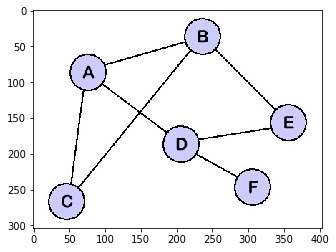

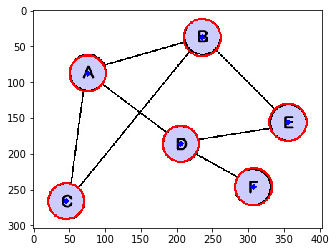

In [4]:
origin = cv2.cvtColor(cv2.imread('graph.png'), cv2.COLOR_BGR2RGB)
plt.imshow(origin)
plt.show()
circles = cv2.HoughCircles(edges, 
                           cv2.HOUGH_GRADIENT,
                           dp=1,       # internal ratio parameter, usually 1
                           minDist=70, # between centers
                           param1=254,  # parameters of mode (canny edge)
                           param2=15,  # bigger - less false positives
                           minRadius=20,
                           maxRadius=35)
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(origin, (*i[:2],), i[2], (255,0,0), 2)
    # draw the center of the circle
    cv2.circle(origin, (*i[:2],), 2, (0,0,255), 3)
plt.imshow(origin)
plt.show()

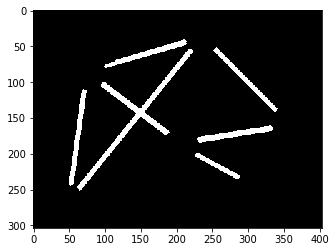

In [31]:
lines = cv2.HoughLinesP(
        edges,
        rho=1,             # distance resolution
        theta=np.pi/180,   # angle resolution
        threshold=25,
        minLineLength=55,
        maxLineGap=30
)
lines = lines.reshape((lines.shape[0], 4))
result = np.zeros_like(edges)
for x1, y1, x2, y2 in lines:
    cv2.line(result, (x1, y1), (x2, y2), 255, 3)
plt.imshow(result, cmap="gray")
plt.show()

In [44]:
def distance(x1, y1, x2, y2):
    return np.sqrt((x1 - x2)**2 + (y1-y2)**2)

In [45]:
import networkx as nx
radius = np.mean(circles[0, :, 2])
radius_threshold = np.sqrt(2 * (radius+15)**2) # for cases if the detected line is smaller

graph = nx.Graph()
for node in circles[0,:]:
    graph.add_node((node[0], node[1]))

for line in lines:
    node1 = None
    node2 = None
    for x,y in graph.nodes():
        distance1 = distance(x, y, line[0], line[1])
        distance2 = distance(x, y, line[2], line[3])
        if distance1 < radius_threshold: # line start is in the increased circle
            node1 = (x, y)
        if distance2 < radius_threshold: # line end is in the increased circle
            node2 = (x, y)
    if node1 and node2:
        graph.add_edge(node1, node2)

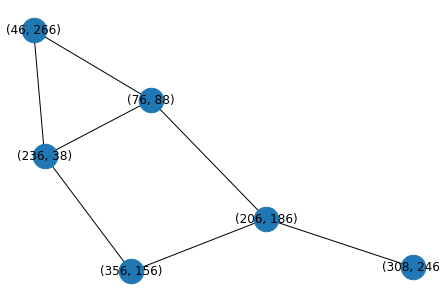

In [50]:
nx.draw(graph, with_labels=True, node_size=600)